In [22]:
def RMSE(y_true, y_pred):
    import numpy as np
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [23]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/all_data_with_author_cluster.csv')
data = data.drop('Unnamed: 0', axis = 1)
out=data[(data['Age']>100)|(data['Age']<8)].index
data.drop(out, axis='index',inplace=True)
#ratings = pd.read_csv('../data_raw/BX-Book-Ratings.csv')
#data.set_index('User-ID')

# 1. 전체 평균 rating 예측

In [3]:
#data = data.drop('Unnamed: 0', axis = 1)
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Author_2cluster,Author_3cluster
0,276762,3453092007,8,"duisburg, nordrhein-westfalen, germany",25.0,germany,Die zweite Haut.,Dean Koontz,1995.0,Heyne,1,2
1,159390,3404122879,10,"dannenfels, rheinland-pfalz, germany",36.0,germany,"Vater Himmel, Mutter Erde.",Sue Harrison,1995.0,L?¼bbe,2,3
2,159390,1853260207,6,"dannenfels, rheinland-pfalz, germany",36.0,germany,Jane Eyre (Wordsworth Classics),Charlotte Bronte,1997.0,NTC/Contemporary Publishing Company,2,2
3,159390,3442426677,7,"dannenfels, rheinland-pfalz, germany",36.0,germany,Die Grast?¤nzer.,Susan Power,1997.0,Goldmann,1,2
4,159390,3426771365,8,"dannenfels, rheinland-pfalz, germany",36.0,germany,Nieten in Nadelstreifen. Deutschlands Manager ...,G?¼nter Ogger,1995.0,"Droemersche Verlagsanstalt Th. Knaur Nachf., G...",1,1


In [4]:
ratings = data[['User-ID', 'ISBN', 'Book-Rating']]

In [5]:
round(ratings['Book-Rating'].mean(), 3)

7.741

In [8]:
y_true = data['Book-Rating']
y_pred = 7.741
rmse = RMSE(y_true, y_pred)

print(rmse)

1.8283187086561614


# 1.1 평가 0 제거

In [7]:
data1 = data[data['Book-Rating'] != 0]

In [8]:
ratings = data1[['User-ID', 'ISBN', 'Book-Rating']]
round(ratings['Book-Rating'].mean(), 3)


7.74

In [9]:
y_true = data1['Book-Rating']
y_pred = 7.74
rmse = RMSE(y_true, y_pred)

print(rmse)

1.8289947390661851


In [25]:
data1['Book-Rating'].describe()

count    35522.000000
mean         7.739851
std          1.829020
min          1.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: Book-Rating, dtype: float64

In [88]:
sum(data1.groupby('Book-Author').mean()['Book-Rating'] <= 7.5) # 9, 10

5990

In [82]:
sum(data1.groupby('Book-Author').mean()['Book-Rating'] <= 8.5)

9560

In [83]:
sum(data1.groupby('Book-Author').mean()['Book-Rating'] <= 10)

13648

# 2. 도서별 평균 rating 예측

In [15]:
# 2명 이상 예측한 경우에 대해서만
data2 = data.set_index('ISBN')
data2 = data2[data2.groupby('ISBN')['User-ID'].count() >= 2]

<ipython-input-15-cbd54eee8ebf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = data2[data2.groupby('ISBN')['User-ID'].count() >= 2]


In [16]:
data2 = data2.reset_index()

In [17]:
ratings = data2[['User-ID', 'ISBN', 'Book-Rating']]
ratings = ratings.set_index('User-ID')
len(ratings)

71741

In [18]:
book_mean = ratings.groupby('ISBN')['Book-Rating'].mean()

In [19]:
rmse = []
for user in set(ratings.index):
    y_true = ratings.loc[user][['ISBN', 'Book-Rating']]
    y_pred = book_mean[ratings.loc[user]['ISBN']]
    accuracy = RMSE(y_true['Book-Rating'], y_pred)
    rmse.append(accuracy)

In [20]:
print(np.mean(rmse))

3.2734186265860212


# 2.1 0점 제거

In [45]:
# 2명 이상 예측한 경우에 대해서만
data2 = data.set_index('ISBN')
data2 = data2[data2['Book-Rating'] != 0]
data2 = data2[data2.groupby('ISBN')['User-ID'].count() >= 2]

<ipython-input-45-f2f7b0563f16>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2 = data2[data2.groupby('ISBN')['User-ID'].count() >= 2]


In [46]:
data2 = data2.reset_index()

In [47]:
ratings = data2[['User-ID', 'ISBN', 'Book-Rating']]
ratings = ratings.set_index('User-ID')
len(ratings)

18238

In [48]:
book_mean = ratings.groupby('ISBN')['Book-Rating'].mean()

In [49]:
rmse = []
for user in set(ratings.index):
    y_true = ratings.loc[user][['ISBN', 'Book-Rating']]
    y_pred = book_mean[ratings.loc[user]['ISBN']]
    accuracy = RMSE(y_true['Book-Rating'], y_pred)
    rmse.append(accuracy)

In [50]:
print(np.mean(rmse))

1.2722656231406186


# 3. Demographic

In [ ]:
data3 = data[(data.Age >= 7)&(data.Age <= 100)]

In [ ]:
data3['Age_range'] = data3['Age']//10 * 10

In [ ]:
data3.groupby(['Age_range', 'ISBN'])['Book-Rating'].mean()

# 4. SVD++

# 5. FM

# 6. DL

In [24]:
data = data[data['Book-Rating'] != 0]

In [25]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,country,Book-Title,Book-Author,Year-Of-Publication,Publisher,Author_2cluster,Author_3cluster
0,276762,3453092007,8,"duisburg, nordrhein-westfalen, germany",25.0,germany,Die zweite Haut.,Dean Koontz,1995.0,Heyne,1,2
1,159390,3404122879,10,"dannenfels, rheinland-pfalz, germany",36.0,germany,"Vater Himmel, Mutter Erde.",Sue Harrison,1995.0,L?¼bbe,2,3
2,159390,1853260207,6,"dannenfels, rheinland-pfalz, germany",36.0,germany,Jane Eyre (Wordsworth Classics),Charlotte Bronte,1997.0,NTC/Contemporary Publishing Company,2,2
3,159390,3442426677,7,"dannenfels, rheinland-pfalz, germany",36.0,germany,Die Grast?¤nzer.,Susan Power,1997.0,Goldmann,1,2
4,159390,3426771365,8,"dannenfels, rheinland-pfalz, germany",36.0,germany,Nieten in Nadelstreifen. Deutschlands Manager ...,G?¼nter Ogger,1995.0,"Droemersche Verlagsanstalt Th. Knaur Nachf., G...",1,1


In [26]:
# make ISBN to int
ISBN_dict = dict()

for i, ISBN in enumerate(data['ISBN'].unique()):
    ISBN_dict[ISBN] = i
data['ISBN_idx'] = data['ISBN'].apply(lambda x : ISBN_dict[x])

In [27]:
# make User-ID to int
USER_dict = dict()

for i, USER in enumerate(data['User-ID'].unique()):
    USER_dict[USER] = i
data['USER_idx'] = data['User-ID'].apply(lambda x : USER_dict[x])

In [28]:
r_cols = ['USER_idx', 'ISBN_idx', 'Book-Rating']
u_cols = ['USER_idx', 'Age']
b_cols = ['ISBN_idx', 'Author_3cluster']

ratings = data[r_cols]
users = data[u_cols].drop_duplicates()
books = data[b_cols].drop_duplicates()

In [29]:
# train-test split
from sklearn.utils import shuffle
TRAIN_SIZE = 0.7
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [30]:
train_u = pd.merge(ratings_train, users, on = 'USER_idx')
test_u = pd.merge(ratings_test, users, on = 'USER_idx')['Age']

train_b = pd.merge(ratings_train, books, on = 'ISBN_idx')['Author_3cluster']
test_b = pd.merge(ratings_test, books, on = 'ISBN_idx')['Author_3cluster']

In [31]:
uL = len(set(users.Age))
aL = len(set(books.Author_3cluster))

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.layers import Dense, Concatenate, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Adamax

In [33]:
# Variable 초기화 
K = 20                             # Latent factor 수 
reg = 0.0001                        # Regularization penalty
mu = ratings_train['Book-Rating'].mean()    # 전체 평균 
M = ratings.USER_idx.max() + 1       # Number of users
N = ratings.ISBN_idx.max() + 1      # Number of movies

In [34]:
# Defining RMSE measure
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [35]:
# Keras model
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2(reg))(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2(reg))(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2(reg))(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2(reg))(item)

In [36]:
# Concatenate layers
P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

In [37]:
age = Input(shape=(1, ))
age_embedding = Embedding(uL, 1, embeddings_regularizer = l2())(age)
age_layer = Flatten()(age_embedding)

author = Input(shape=(1, ))
author_embedding = Embedding(aL, 1, embeddings_regularizer = l2())(author)
author_layer = Flatten()(author_embedding)


In [38]:
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias, age_layer, author_layer])

In [39]:
# Neural network
R = Dense(2048)(R)
R = Activation('linear')(R)
R = Dense(512)(R)
R = Activation('relu')(R)
R = Dense(1)(R)

In [40]:
# # Neural network 2

# R = Dense(2048)(R)
# R = Activation('relu')(R)
# R = Dense(512)(R)
# R = Activation('linear')(R)
# R = Dense(1)(R)

In [41]:
model = Model(inputs=[user, item, age, author], outputs=R)
model.compile(
  loss=RMSE,
  #optimizer=SGD(lr=0.001, momentum=0.9),
  optimizer=Adam(lr=0.001),
  metrics=[RMSE]
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

/Users/paek-injin/.local/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [42]:
# Model fitting
result = model.fit(
  x=[ratings_train['USER_idx'].values, ratings_train['ISBN_idx'].values, train_u.values, train_b.values],
  y=ratings_train['Book-Rating'].values - mu,
  epochs=45,
  batch_size=256,
  validation_data=(
    [ratings_test['USER_idx'].values, ratings_test['ISBN_idx'].values, test_u.values, test_b.values],
    ratings_test['Book-Rating'].values - mu
  )
)

Epoch 1/45


ValueError: in user code:

    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/paek-injin/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/paek-injin/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/paek-injin/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/functional.py:414 call
        return self._run_internal_graph(
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/paek-injin/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 44 but received input with shape (None, 47)


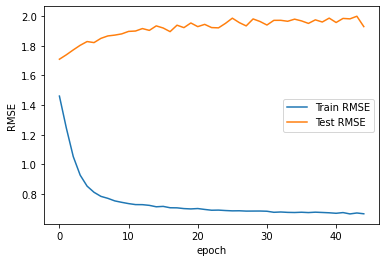

In [21]:
# Plot RMSE
import matplotlib.pyplot as plt
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [22]:
# Prediction
user_ids = ratings_test['USER_idx'].values[0:6]
item_ids = ratings_test['ISBN_idx'].values[0:6]

predictions = model.predict([user_ids, item_ids]) + mu
print("Actuals: \n", ratings_test[0:6])
print()
print("Predictions: \n", predictions)

Actuals: 
        USER_idx  ISBN_idx  Book-Rating
76241      3911     11750           10
46136      4746     11827           10
20531       405      3222            6
39005      1359     10050            6
40702      2056      1814            7
17319      4601     18295            8

Predictions: 
 [[9.691592 ]
 [9.689684 ]
 [8.324437 ]
 [7.0354695]
 [6.706794 ]
 [7.9258437]]


In [79]:
# 정확도(RMSE)를 계산하는 함수 
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

user_ids = ratings_test['USER_idx'].values
item_ids = ratings_test['ISBN_idx'].values
y_pred = model.predict([user_ids, item_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test['Book-Rating'])

RMSE2(y_true, y_pred)

3.6858598290277387